In [55]:
import pandas as pd

# 1. Load data

In [56]:
df = pd.read_csv('sales.csv')

# 2. Data Cleaning and Wrangling

In [57]:
#Check the shape of the data
df.shape

(8523, 12)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [59]:
df[df['Item_Identifier'] == '75.4670']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


<Axes: >

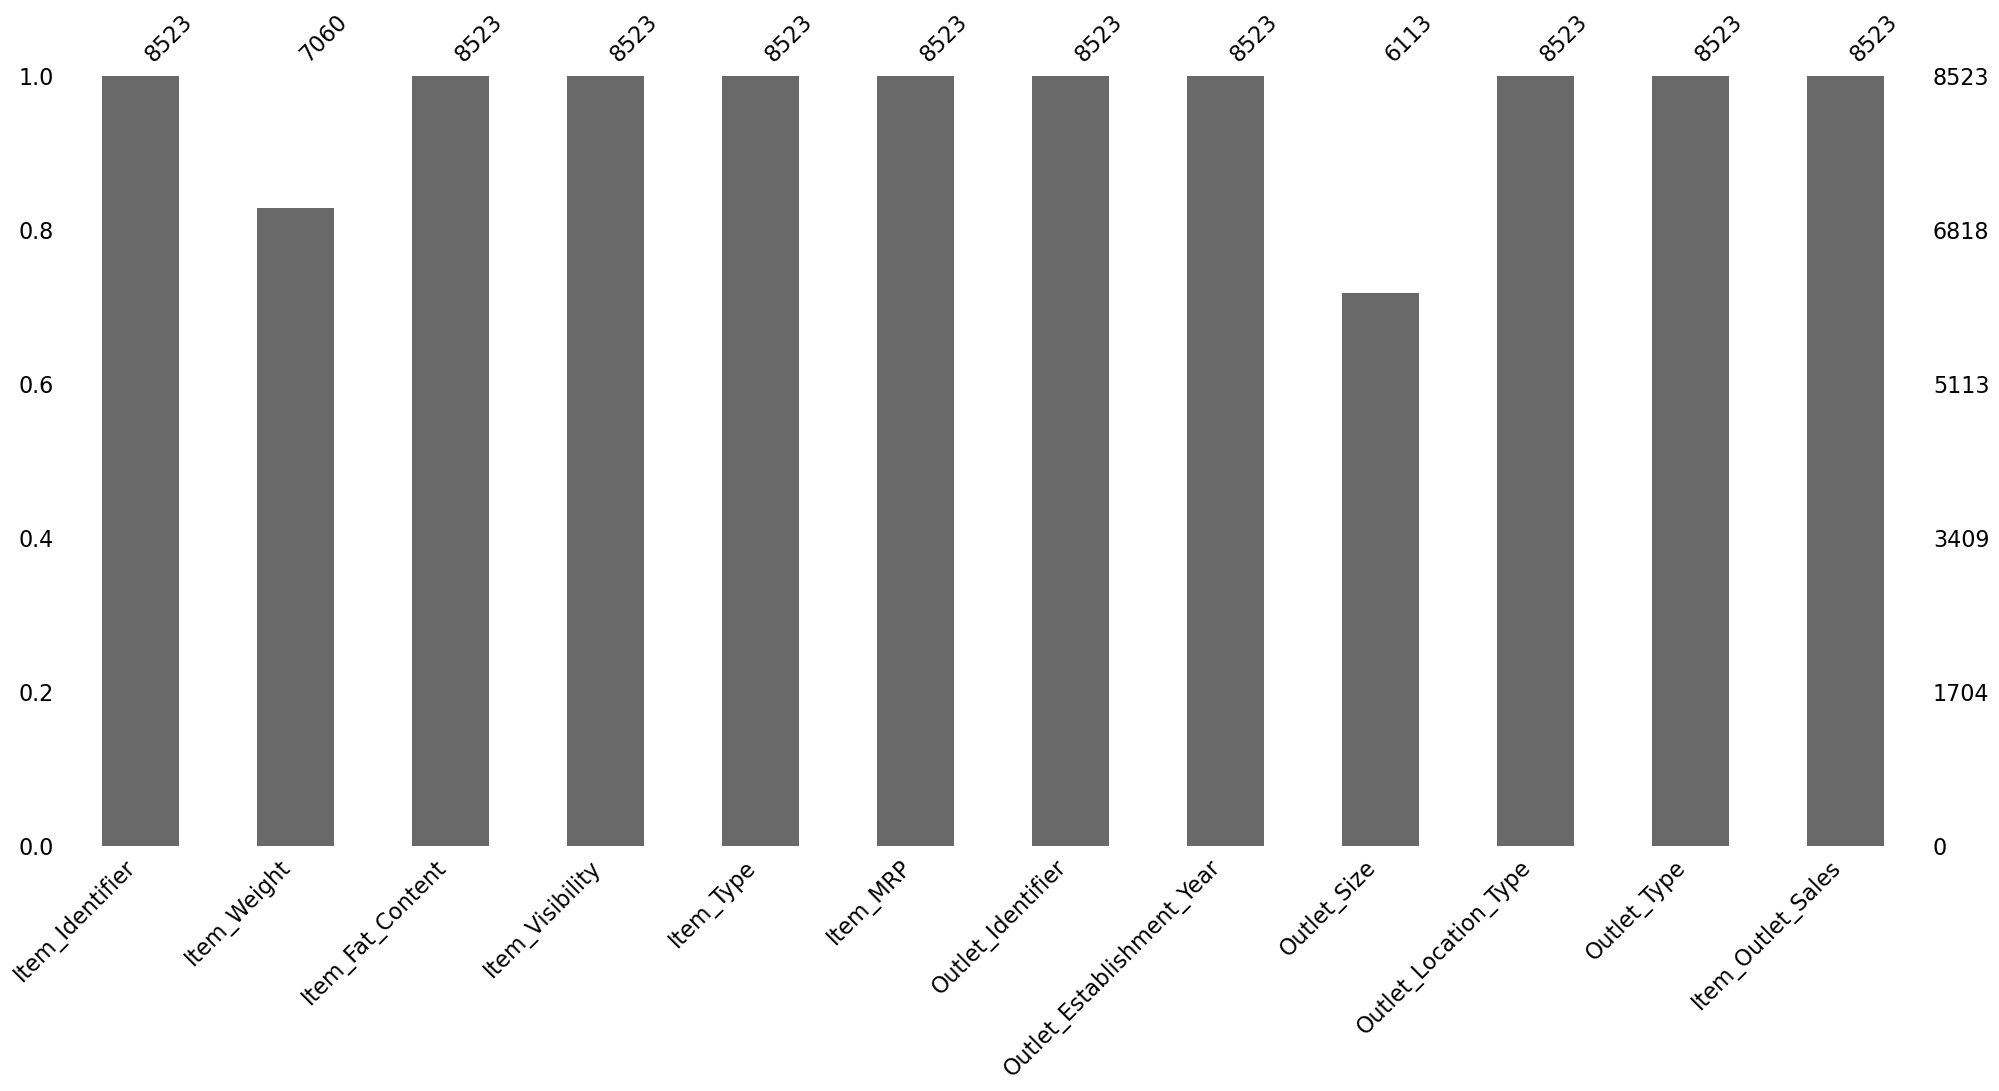

In [60]:
#Visualize missing values in the entire df
import missingno as msno
msno.bar(df)

In [61]:
#Percentage_of_missing_values
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Only 2 columns have missing values. Both columns have less than 30% missing values. We can impute these columns later.

# 2.2 Data Cleaning and featurization

In [62]:
#Calculate MRP/Weight
df['MRPperUnit'] = df['Item_MRP']/df['Item_Weight']

In [63]:
#Calculate age of establishment
df['Years_Open'] = df['Outlet_Establishment_Year'].apply(lambda x: 2013 - x)

In [64]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRPperUnit,Years_Open
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26.861204,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8.153581,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,8.092457,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,9.484115,15
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,6.031512,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,31.248623,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,12.906563,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,8.030415,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,14.304189,4


In [65]:
#We can look at the non-numeric and check the values. 
obj_df = df.select_dtypes(include=['object'])
obj_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [66]:
#list of categorical columns
col_list = list(obj_df)

In [67]:
#check the unique value by column
for col in col_list:
    print(f"Unique values in {col} :")
    print(df[col].unique())
    print("\n")

Unique values in Item_Identifier :
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Unique values in Item_Fat_Content :
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Unique values in Item_Type :
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Unique values in Outlet_Identifier :
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Unique values in Outlet_Size :
['Medium' nan 'High' 'Small']


Unique values in Outlet_Location_Type :
['Tier 1' 'Tier 3' 'Tier 2']


Unique values in Outlet_Type :
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [68]:
#replace the shortened names with the full names in the fat content column
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [69]:
#Create coded Outlet_Size dictionary for renaming
Outlet_Size_dict = {'Small': 'a',
               'Medium': 'b',
               'High': 'c'         
}

In [70]:
#replace Outlet_Size with alphabet codes
df['Outlet_Size'] = df['Outlet_Size'].replace(Outlet_Size_dict).astype('category')

In [71]:
#Create coded Outlet_Size dictionary for renaming
Outlet_Location_Type_dict = {'Tier 1': 'a',
               'Tier 2': 'b',
               'Tier 3': 'c'         
}

In [72]:
#replace Outlet_Location_Type with alphabet codes
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].replace(Outlet_Location_Type_dict).astype('category')

In [73]:
cat_bins=['a','b','c']

In [74]:
col_list

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [75]:
#list of numerical columns
num_list = list(df.drop(columns=col_list).drop(columns=['Item_Outlet_Sales', 'Outlet_Establishment_Year'],axis=1))

In [76]:
#list of non-numerical columns
cat_list = [
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [77]:
#list of category type columns
blist = ['Outlet_Size','Outlet_Location_Type']

In [78]:
#Save dataframe to file
pd.DataFrame(df).to_csv('df_bmsales.csv', index=False)

In [79]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRPperUnit,Years_Open
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,b,a,Supermarket Type1,3735.1380,26.861204,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,b,c,Supermarket Type2,443.4228,8.153581,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,b,a,Supermarket Type1,2097.2700,8.092457,14
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,c,Grocery Store,732.3800,9.484115,15
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,c,c,Supermarket Type1,994.7052,6.031512,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,c,c,Supermarket Type1,2778.3834,31.248623,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,b,Supermarket Type1,549.2850,12.906563,11
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,a,b,Supermarket Type1,1193.1136,8.030415,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,b,c,Supermarket Type2,1845.5976,14.304189,4
